# Menentukan Jumlah Client Yang Ingin Membeli Sebuah Kendaraan Menggunakan Model KNN

## 1. Import Library & Load Dataset

In [121]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [122]:
# Load dataset dari local device
data_train = pd.read_csv("../Downloads/Tugas Orang/kendaraan_train.csv")
data_test = pd.read_csv("../Downloads/Tugas Orang/kendaraan_test.csv")

In [123]:
data_train.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,NaN,34857.0,88.0,194.0,0


In [124]:
data_test.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0


## 2. Visualisasi Sebelum Preprocessing

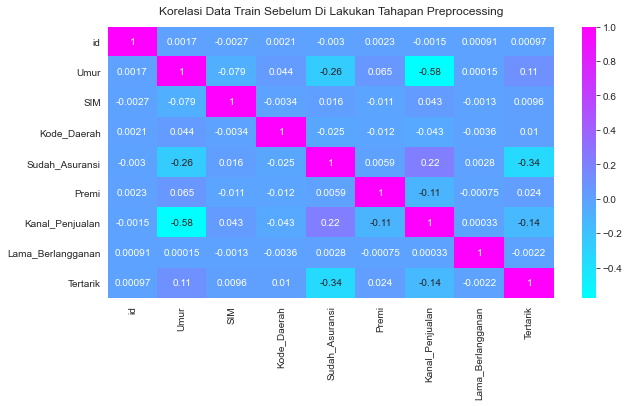

In [125]:
# Membuat visaulisasi sebelum data train.csv di lakukan tahapan preprocessing. Hal ini saya lakukan untuk melihat 
# sebuah perbedaan antara nilai korelasi dari setiap kolom sebelum di lakukan tahapan preprocessing
# dan sesudah di preprocessing pada data train

plt.figure(figsize=(10, 5))

korelasi_data_train = sns.heatmap(data_train.corr(), cmap="cool", annot=True)
korelasi_data_train.set_title("Korelasi Data Train Sebelum Di Lakukan Tahapan Preprocessing", fontdict={"fontsize":12}, pad=12);

Kenapa hanya beberapa kolom saja yang terlihat nilai korelasinya, yakni hanya 9 kolom saja dari 12 kolom? Hal tersebut dikarenakan 3 kolom (yakni kolom "Jenis_Kelamin", "Umur_Kendaraan", dan "Kendaraan_Rusak") memiliki tipe string atau masih berupa kategorik. Sedangkan untuk melihat nilai korelasi dibutuhkan tipe data numerik, yaitu integer ataupun float.

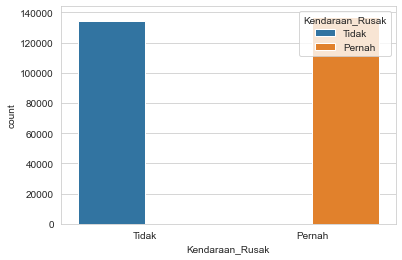

<Figure size 504x504 with 0 Axes>

In [126]:
# Melakukan visualisasi untuk kolom "Tertarik" pada data train

sns.set_style("whitegrid")
sns.countplot(x="Kendaraan_Rusak", hue="Kendaraan_Rusak", data=data_train)
plt.figure(figsize=(7, 7))
plt.show()

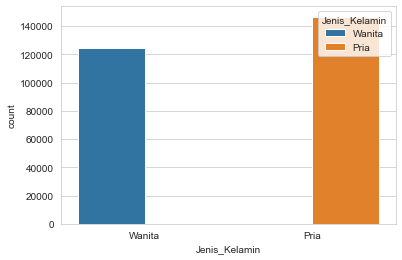

<Figure size 504x504 with 0 Axes>

In [127]:
# Melakukan visualisasi untuk kolom "Jenis_Kelamin" pada data train

sns.set_style("whitegrid")
sns.countplot(x="Jenis_Kelamin", hue="Jenis_Kelamin", data=data_train)
plt.figure(figsize=(7, 7))
plt.show()

Setelah melakukan visualisasi sebelum nilai data yang ada di data_train dilakukan preprocessing, saya akan mengecek terlebih dahulu apakah di dalam data_train memiliki nilai data yang kosong/NaN atau sama sekali tidak mempunyainya.

In [128]:
# Mengecek nilai kosong di dalam data train.csv
data_train.isnull().sum()

id                       0
Jenis_Kelamin        14440
Umur                 14214
SIM                  14404
Kode_Daerah          14306
Sudah_Asuransi       14229
Umur_Kendaraan       14275
Kendaraan_Rusak      14188
Premi                14569
Kanal_Penjualan      14299
Lama_Berlangganan    13992
Tertarik                 0
dtype: int64

Terlihat pada data train terdapat banyak sekali nilai data yang masih kosong. Maka langkah selanjutnya saya akan melakukan proses preprocessing untuk data train.

## 3. Preprocessing & Visualisasi Setelah Preprocessing Pada Data Train

Sebelum memasuki langkah preprocessing, saya akan memberi tahu bahwasanya ada beberapa tahapan yang saya lakukan di dalam preprocessing ini, diantaranya adalah:
1. Mengisi nilai yang kosong menjadi nilai data yang sudah ditentukan agar tidak terjadi bias. Semisal nilai kosong yang terdapat di dalam kolom "Umur_Kendaraan" akan saya isi menjadi nilai "> 2 Tahun". Dan Kolom "Kendaraan_Rusak" akan saya isi nilai kosongnya menjadi "Tidak".
2. Langsung mengubah kolom yang memiliki tipe data string menjadi integer.
3. Menghapus kolom yang tidak diperlukan, karena jika dibiarkan akan sangat mempengaruhi tingkatan akurasi dan persebaran klasifikasi yang kurang baik.
4. Karena pada data train masih banyak sekali terdapat nilai yang kosong/NaN, sisanya akan saya isi dengan nilai rata-rata yang dimiliki oleh masing-masing kolom.

In [129]:
# Mulai mengganti nilai NaN pada kolom "Umur_Kendaraan" menjadi nilai yaitu "> 2 Tahun"
data_train["Umur_Kendaraan"] = data_train["Umur_Kendaraan"].fillna("> 2 Tahun")

# Mulai mengganti nilai NaN pada kolom "Kendaraan_Rusak" menjadi nilai yaitu "Tidak"
data_train["Kendaraan_Rusak"] = data_train["Kendaraan_Rusak"].fillna("Tidak")

data_train.head()

,id,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,1,Wanita,30.0,1.0,33.0,1.0,< 1 Tahun,Tidak,28029.0,152.0,97.0,0
1,2,Pria,48.0,1.0,39.0,0.0,> 2 Tahun,Pernah,25800.0,29.0,158.0,0
2,3,NaN,21.0,1.0,46.0,1.0,< 1 Tahun,Tidak,32733.0,160.0,119.0,0
3,4,Wanita,58.0,1.0,48.0,0.0,1-2 Tahun,Tidak,2630.0,124.0,63.0,0
4,5,Pria,50.0,1.0,35.0,0.0,> 2 Tahun,Tidak,34857.0,88.0,194.0,0


In [130]:
# Menghapus Beberapa kolom yang tidak dibutuhkan

data_train = data_train.drop(["id", "Jenis_Kelamin", "SIM", "Kode_Daerah", "Lama_Berlangganan", "Kanal_Penjualan"], axis = 1)
data_train.head()

,Umur,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Tertarik
0,30.0,1.0,< 1 Tahun,Tidak,28029.0,0
1,48.0,0.0,> 2 Tahun,Pernah,25800.0,0
2,21.0,1.0,< 1 Tahun,Tidak,32733.0,0
3,58.0,0.0,1-2 Tahun,Tidak,2630.0,0
4,50.0,0.0,> 2 Tahun,Tidak,34857.0,0


In [131]:
# Mengubah tipe data dari kolom yang memiliki nilai kategorik/string menjadi integer/numerik

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data_train["Sudah_Asuransi"] = le.fit_transform(data_train["Sudah_Asuransi"])
data_train["Umur_Kendaraan"] = le.fit_transform(data_train["Umur_Kendaraan"])
data_train["Kendaraan_Rusak"] = le.fit_transform(data_train["Kendaraan_Rusak"])

data_train.head()

,Umur,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Tertarik
0,30.0,1,1,1,28029.0,0
1,48.0,0,2,0,25800.0,0
2,21.0,1,1,1,32733.0,0
3,58.0,0,0,1,2630.0,0
4,50.0,0,2,1,34857.0,0


In [132]:
# Karena ada beberapa kolom yang masih memiliki nilai NaN, maka saya akan mengganti/mengisinya nilai NaN menjadi nilai Mean

mean = data_train.mean()
data_train = data_train.replace(np.nan, mean)
data_train.head()

,Umur,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Tertarik
0,30.0,1,1,1,28029.0,0
1,48.0,0,2,0,25800.0,0
2,21.0,1,1,1,32733.0,0
3,58.0,0,0,1,2630.0,0
4,50.0,0,2,1,34857.0,0


In [133]:
# Mengecek kembali apakah masih terdapat nilai yang masih kosong atau tidak di dalam data train

data_train.isnull().sum()

Umur               0
Sudah_Asuransi     0
Umur_Kendaraan     0
Kendaraan_Rusak    0
Premi              0
Tertarik           0
dtype: int64

Karena nilai kosong/NaN sudah tidak ada pada setiap kolom, maka saya akan membuatkan visualisasi kembali untuk melihat sebuah perbedaan visualisasi dari yang sebelum preprocessing dan sesudah preprocessing.

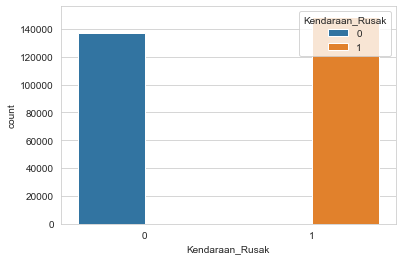

<Figure size 504x504 with 0 Axes>

In [134]:
# Melakukan visualisasi untuk kolom "Kendaraan_Rusak" pada data train

sns.set_style("whitegrid")
sns.countplot(x="Kendaraan_Rusak", hue="Kendaraan_Rusak", data=data_train)
plt.figure(figsize=(7, 7))
plt.show()

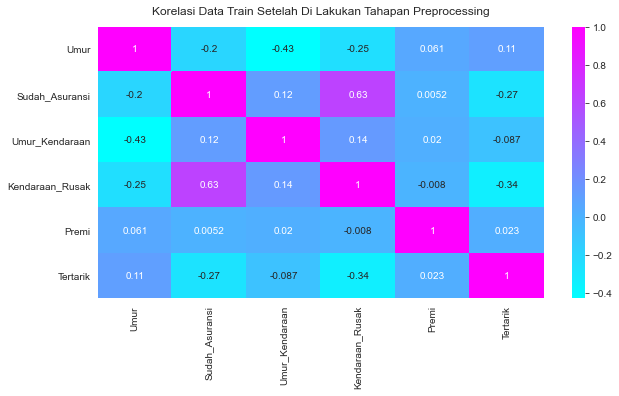

In [135]:
# Membuat visualisasi untuk menampilkan nilai korelasi agar dapat melihat perbedaan visualisasi antara sebelum di preprocessing
# dan sesudah di preprocessing

plt.figure(figsize=(10, 5))

korelasi_data_train = sns.heatmap(data_train.corr(), cmap="cool", annot=True)
korelasi_data_train.set_title("Korelasi Data Train Setelah Di Lakukan Tahapan Preprocessing", fontdict={"fontsize":12}, pad=12);

## 4. Pemodelan Dengan KNN Menggunakan Data Train.csv

In [136]:
# Pemisahan data menjadi 2 variable

x = data_train.drop(["Tertarik"], axis=1)
y = data_train["Tertarik"]

In [137]:
# Melakukan pembagian data menjadi 2 bagian (data train & data test) menggunakan train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)

Penjelasan dari proses pemisahan data menjadi 2 variabel dan fungsi train_test_split: 
1. x: fitur yang ada di dalam data, kecuali kolom untuk label output.
2. y: kolom yang menjadi variabel target. Di kasus ini variabel target merupakan kolom "Tertarik".
3. test_size: Nilai presentase dari sebuah ukuran variabel test. Dalam pengujian ini saya memakai nilai test_size = 0.3 yang dimana ukuran dari variabel test mencapai 30% sehingga untuk ukuran variabel trainnya adalah 70%.
4. random_state: Menetapkan nilai. Jika nilainya sama maka fungsi train_test_split akan menghasilkan pemisahan nilai yang sama persis di setiap waktunya.

In [138]:
# Melakukan proses standarisasi
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [140]:
# Pemaggilan model decision tree terhadap variabel training
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

neigh = KNeighborsClassifier()

# Tuning Hyperparameters untuk model KNN
parameters = {
    "n_neighbors":[5],
    "leaf_size":[5],
    "weights":["distance"],
    "algorithm":["ball_tree"],
}

knn = GridSearchCV(neigh, parameters)

knn.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree'], 'leaf_size': [5],
                         'n_neighbors': [5], 'weights': ['distance']})

GridSearchCV merupakan sebuah teknik dalam mencari parameter terbaik (sesuai dengan model machine learning yang dipakai) untuk mengklasifikasikan sebuah label output.

In [141]:
# Melakukan pengujian untuk variabel test dan variabel train
print("------------Prediksi dari variabel test------------------")
y_pred_test = knn.predict(x_test)
print(y_pred_test)

print("------------Prediksi dari variabel train-----------------")
y_pred_train = knn.predict(x_train)
print(y_pred_train)

------------Prediksi dari variabel test------------------
[0 0 0 ... 0 0 1]
------------Prediksi dari variabel train-----------------
[0 0 0 ... 0 0 1]


In [142]:
# Pengukuran performa untuk variabel test dan train

print("------------------Performa Variabel Test------------------------")
print(confusion_matrix(y_test, y_pred_test))

print("------------------Performa Variabel Train------------------------")
print(confusion_matrix(y_train, y_pred_train))

------------------Performa Variabel Test------------------------
[[71378  3808]
 [ 8862  1702]]
------------------Performa Variabel Train------------------------
[[173751   1888]
 [  4990  19452]]


In [143]:
# Menampilkan tingkat akurasi, precision, recall & f1-score dari model KNN pada dataset Train.csv

print("-----------------------Variabel Test-------------------------------")
print(classification_report(y_test, y_pred_test))

print("-----------------------Variabel Train------------------------------")
print(classification_report(y_train, y_pred_train))

-----------------------Variabel Test-------------------------------
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     75186
           1       0.31      0.16      0.21     10564

    accuracy                           0.85     85750
   macro avg       0.60      0.56      0.57     85750
weighted avg       0.82      0.85      0.83     85750

-----------------------Variabel Train------------------------------
              precision    recall  f1-score   support

           0       0.97      0.99      0.98    175639
           1       0.91      0.80      0.85     24442

    accuracy                           0.97    200081
   macro avg       0.94      0.89      0.92    200081
weighted avg       0.96      0.97      0.96    200081



Karena pada variabel train mendapatkan akurasi yang tinggi dari pada variabel test (yang dimaksud overfitting) , maka dari itu saya akan mengatasi problem ini dengan metode SMOTE. Metode Synthetic Minority Over-samplingTechnique (SMOTE) merupakan metode yang populer untuk diterapkan dalam rangka menangani ketidakseimbangan kelas (imbalanced data). Teknik ini mensintesis sampel baru dari kelas minoritas untuk menyeimbangkan dataset dengan cara membuat instance baru dari minority class dengan pembentukan convex kombanasi dari instances yang saling berdekatan.

In [144]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 35)
x_res_smote, y_res_smote = sm.fit_resample(x_test, y_test)

In [145]:
# Melakukan pemanggilan model decision tree kembali dengan membuat variabel baru yaitu "neig1" dan "knn_smote" untuk membedakan
# mana yang sudah dilakukan proses smote dan mana yang belum
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

neigh1 = KNeighborsClassifier()

# Tuning Hyperparameters 
parameters = {
    "n_neighbors":[5],
    "leaf_size":[5],
    "weights":["distance"],
    "algorithm":["ball_tree"],
}

knn_smote = GridSearchCV(neigh1, parameters)

knn_smote.fit(x_res_smote, y_res_smote)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['ball_tree'], 'leaf_size': [5],
                         'n_neighbors': [5], 'weights': ['distance']})

GridSearchCV merupakan sebuah teknik dalam mencari/menggunakan parameter terbaik (sesuai dengan model machine learning yang dipakai) untuk mengklasifikasikan sebuah label output.

In [146]:
# Melakukan pengujian untuk variabel test dan variabel train
print("------------Prediksi dari variabel test------------------")
y_pred_test = knn.predict(x_test)
print(y_pred_test)

print("------------Prediksi dari variabel train-----------------")
y_pred_train_smote = knn_smote.predict(x_train)
print(y_pred_train_smote)

------------Prediksi dari variabel test------------------
[0 0 0 ... 0 0 1]
------------Prediksi dari variabel train-----------------
[0 1 0 ... 0 0 1]


In [147]:
# Pengukuran performa untuk variabel test dan train

print("------------------Performa Variabel Test------------------------")
print(confusion_matrix(y_test, y_pred_test))

print("------------------Performa Variabel Train------------------------")
print(confusion_matrix(y_train, y_pred_train_smote))

------------------Performa Variabel Test------------------------
[[71378  3808]
 [ 8862  1702]]
------------------Performa Variabel Train------------------------
[[131896  43743]
 [  8766  15676]]


In [148]:
# Menampilkan tingkat akurasi, precision, recall & f1-score dari model KNN pada dataset Train.csv

print("-----------------------Variabel Test-------------------------------")
print(classification_report(y_test, y_pred_test))

print("-----------------------Variabel Train------------------------------")
print(classification_report(y_train, y_pred_train_smote))

-----------------------Variabel Test-------------------------------
              precision    recall  f1-score   support

           0       0.89      0.95      0.92     75186
           1       0.31      0.16      0.21     10564

    accuracy                           0.85     85750
   macro avg       0.60      0.56      0.57     85750
weighted avg       0.82      0.85      0.83     85750

-----------------------Variabel Train------------------------------
              precision    recall  f1-score   support

           0       0.94      0.75      0.83    175639
           1       0.26      0.64      0.37     24442

    accuracy                           0.74    200081
   macro avg       0.60      0.70      0.60    200081
weighted avg       0.86      0.74      0.78    200081



Ket:
1. Precision: merupakan seberapa akurat model yang digunakan dalam melakukan klasifikasi.
2. Recall: merupakan gambaran dari keberhasilan suatu algoritma.
3. F1-score: Perbandingan rata-rata precision dan recall yang telah dibobotkan.

In [149]:
print("Jumlah Prediksi Pada Variabel Test Adalah :", y_pred_test)
print("Jumlah Prediksi Pada Variabel Train Adalah :", y_pred_train_smote)

Jumlah Prediksi Pada Variabel Test Adalah : [0 0 0 ... 0 0 1]
Jumlah Prediksi Pada Variabel Train Adalah : [0 1 0 ... 0 0 1]


In [150]:
# Memanggil kolom "Tertarik" pada variabel y_pred_test dan juga membuat variabel baru yang bernama output_train

output_test = pd.DataFrame({"Tertarik" : y_pred_test})
output_test.head()

,Tertarik
0,0
1,0
2,0
3,0
4,0


In [151]:
# Memanggil kolom "Tertarik" pada variabel y_pred_train_smote dan juga membuat variabel baru yang bernama output_train

output_train = pd.DataFrame({"Tertarik" : y_pred_train_smote})
output_train.head()

,Tertarik
0,0
1,1
2,0
3,0
4,0


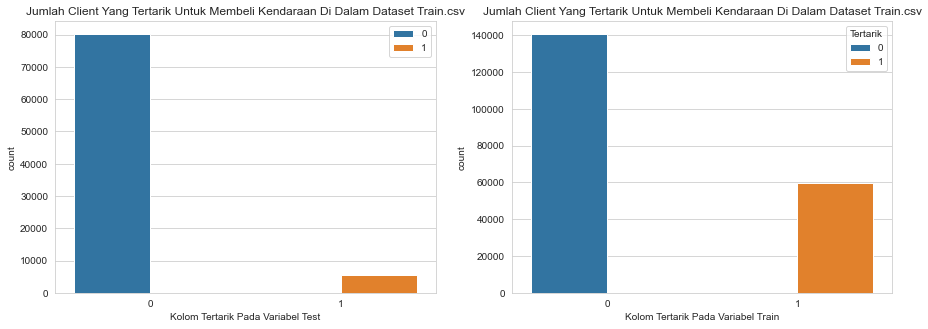

In [152]:
# Membuat visualisasi untuk memprediksi apakah client tertarik untuk membeli kendaraan atau tidak
plt.figure(figsize=(15, 5))

# Visualisasi kolom Target dari variable output_train
plt.subplot(1,2,1)
sns.countplot(x="Tertarik", hue="Tertarik", data=output_test)
plt.title("Jumlah Client Yang Tertarik Untuk Membeli Kendaraan Di Dalam Dataset Train.csv")
plt.xlabel("Kolom Tertarik Pada Variabel Test")
plt.legend()

# Visualisasi kolom Target dari variable output_train
plt.subplot(1,2,2)
sns.countplot(x="Tertarik", hue="Tertarik", data=output_train)
plt.title("Jumlah Client Yang Tertarik Untuk Membeli Kendaraan Di Dalam Dataset Train.csv")
plt.xlabel("Kolom Tertarik Pada Variabel Train")
plt.show()

# 0 = Pelanggan Tidak Tertarik & 1 = Pelanggan Tertarik

## 5. Preprocessing & Visualisasi Pada Data Test 

Sebelum memasuki langkah preprocessing, saya akan menjelaskan beberapa tahapan yang saya lakukan di dalam preprocessing ini, diantaranya adalah:
1. Menghapus kolom yang tidak diperlukan, karena jika dibiarkan akan sangat mempengaruhi tingkatan akurasi dan persebaran klasifikasi yang kurang baik.
2. Langsung mengubah kolom yang memiliki tipe data string menjadi integer.

Tetapi sebelum saya lakukan langkah preprocessing, saya akan membuat sebuah visualisasi sebelum langkah preprocessing dilakukan.

In [153]:
data_test.head()

,Jenis_Kelamin,Umur,SIM,Kode_Daerah,Sudah_Asuransi,Umur_Kendaraan,Kendaraan_Rusak,Premi,Kanal_Penjualan,Lama_Berlangganan,Tertarik
0,Wanita,49,1,8,0,1-2 Tahun,Pernah,46963,26,145,0
1,Pria,22,1,47,1,< 1 Tahun,Tidak,39624,152,241,0
2,Pria,24,1,28,1,< 1 Tahun,Tidak,110479,152,62,0
3,Pria,46,1,8,1,1-2 Tahun,Tidak,36266,124,34,0
4,Pria,35,1,23,0,1-2 Tahun,Pernah,26963,152,229,0


### Visualisasi Sebelum Preprocessing

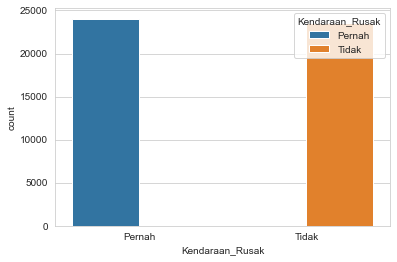

<Figure size 504x504 with 0 Axes>

In [154]:
# Melakukan visualisasi untuk kolom "Kendaraan_Rusak" pada data test

sns.set_style("whitegrid")
sns.countplot(x="Kendaraan_Rusak", hue="Kendaraan_Rusak", data=data_test)
plt.figure(figsize=(7, 7))
plt.show()

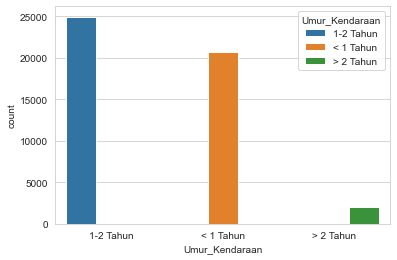

<Figure size 504x504 with 0 Axes>

In [155]:
# Melakukan visualisasi untuk kolom "Umur_Kendaraan" pada data test

sns.set_style("whitegrid")
sns.countplot(x="Umur_Kendaraan", hue="Umur_Kendaraan", data=data_test)
plt.figure(figsize=(7, 7))
plt.show()

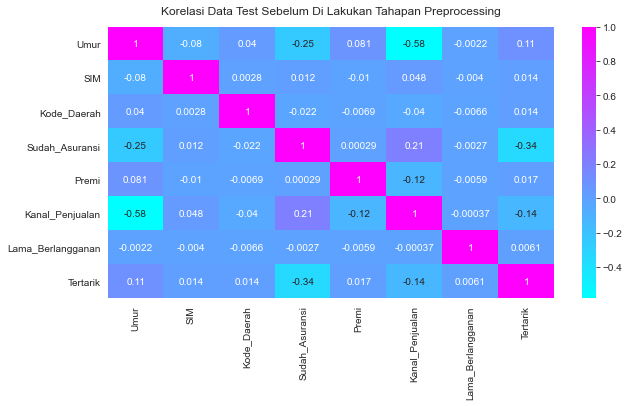

In [156]:
# Membuat visaulisasi sebelum data di lakukan tahapan preprocessing. Hal ini saya lakukan untuk melihat sebuah perbedaan antara
# nilai korelasi dari setiap kolom sebelum di lakukan tahapan preprocessing dan sesudah di preprocessing pada data test

plt.figure(figsize=(10, 5))

korelasi_data_test = sns.heatmap(data_test.corr(), cmap="cool", annot=True)
korelasi_data_test.set_title("Korelasi Data Test Sebelum Di Lakukan Tahapan Preprocessing", fontdict={"fontsize":12}, pad=12);

Karena kolom "Jenis_Kelamin", "Umur_Kendaraan", dan "Kendaraan_Rusak" memiliki tipe data string, maka dalam sebuah visualisasi untuk melihat nilai korelasi antar kolom, 3 kolom tersebut tidak ada karena 3 kolom tersebut memiliki tipe data string (kategorikal). Sedangkan untuk melihat nilai korelasi dibutuhkan tipe data numerik (yaitu integer ataupun float).

### Preprocessing Data Test

In [157]:
# Menghapus Beberapa kolom yang tidak dibutuhkan

data_test = data_test.drop(["Jenis_Kelamin", "SIM", "Kode_Daerah", "Sudah_Asuransi", "Lama_Berlangganan",
                            "Kanal_Penjualan"], axis = 1)
data_test.head()

,Umur,Umur_Kendaraan,Kendaraan_Rusak,Premi,Tertarik
0,49,1-2 Tahun,Pernah,46963,0
1,22,< 1 Tahun,Tidak,39624,0
2,24,< 1 Tahun,Tidak,110479,0
3,46,1-2 Tahun,Tidak,36266,0
4,35,1-2 Tahun,Pernah,26963,0


In [158]:
# Mengubah tipe data dari kolom yang memiliki nilai kategorik/string menjadi integer/numerik

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

data_test["Umur_Kendaraan"] = le.fit_transform(data_test["Umur_Kendaraan"])
data_test["Kendaraan_Rusak"] = le.fit_transform(data_test["Kendaraan_Rusak"])

data_test.head()

,Umur,Umur_Kendaraan,Kendaraan_Rusak,Premi,Tertarik
0,49,0,0,46963,0
1,22,1,1,39624,0
2,24,1,1,110479,0
3,46,0,1,36266,0
4,35,0,0,26963,0


### Visualisasi Setelah Preprocessing

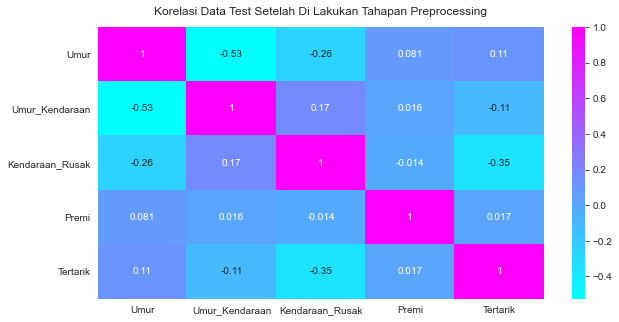

In [159]:
# Membuat visualisasi untuk menampilkan nilai korelasi dari data test agar dapat melihat perbedaan visualisasi 
# antara sebelum di preprocessing dan sesudah di preprocessing

plt.figure(figsize=(10, 5))

korelasi_data_test = sns.heatmap(data_test.corr(), cmap="cool", annot=True)
korelasi_data_test.set_title("Korelasi Data Test Setelah Di Lakukan Tahapan Preprocessing", fontdict={"fontsize":12}, pad=12);

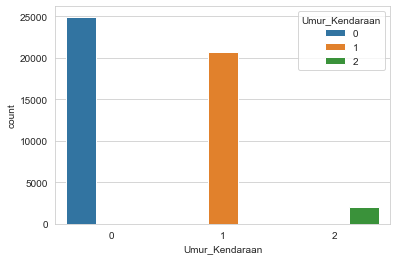

<Figure size 504x504 with 0 Axes>

In [160]:
# Melakukan visualisasi untuk kolom "Umur_Kendaraan" pada data test

sns.set_style("whitegrid")
sns.countplot(x="Umur_Kendaraan", hue="Umur_Kendaraan", data=data_test)
plt.figure(figsize=(7, 7))
plt.show()

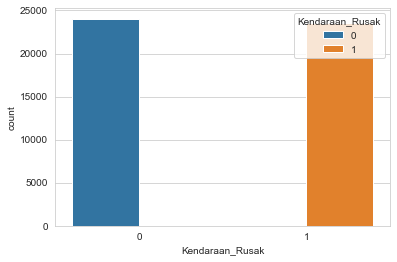

<Figure size 504x504 with 0 Axes>

In [161]:
# Melakukan visualisasi untuk kolom "Kendaraan_Rusak" pada data test

sns.set_style("whitegrid")
sns.countplot(x="Kendaraan_Rusak", hue="Kendaraan_Rusak", data=data_test)
plt.figure(figsize=(7, 7))
plt.show()

<AxesSubplot:xlabel='Umur', ylabel='Premi'>

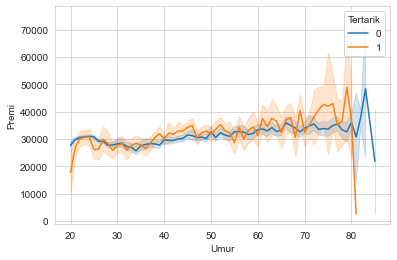

In [162]:
# Visualisasi untuk melihat di umur berapa client mayoritas tertarik membali kendaraan berdasarkan nilai premi
sns.lineplot(x="Umur", y="Premi",
             hue="Tertarik", data=data_test)

Catatan:
Nilai premi merupakan sejumlah uang yang harus dibayarkan setiap bulannya oleh pembeli kendaraan sebagai kewajiban dari tanggung jawabnya atas keikutsertaannya di pelayanan asuransi.

## 7. Pemodelan Dengan KNN Menggunakan Data Test.csv 

In [163]:
# Pemisahan data menjadi 2 variable

x = data_test.drop(["Tertarik"], axis=1)
y = data_test["Tertarik"]

In [164]:
# Melakukan pembagian data menjadi 2 bagian (data train & data test) menggunakan train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

Penjelasan dari proses pemisahan data menjadi 2 variabel dan fungsi train_test_split: 
1. x: fitur yang ada di dalam data, kecuali kolom untuk label output.
2. y: kolom yang menjadi variabel target. Di kasus ini variabel target merupakan kolom "Tertarik".
3. test_size: Nilai presentase dari sebuah ukuran variabel test. Dalam pengujian ini saya memakai nilai test_size = 0.2 yang dimana ukuran dari variabel test mencapai 20% sehingga untuk ukuran variabel trainnya adalah 80%.
4. random_state: Menetapkan nilai. Jika nilainya sama maka fungsi train_test_split akan menghasilkan pemisahan nilai yang sama persis di setiap waktunya.

In [165]:
# Melakukan proses standarisasi
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.fit_transform(x_test)

In [166]:
# Pemaggilan model decision tree terhadap variabel training
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

neigh = KNeighborsClassifier()

# Tuning Hyperparameters untuk model KNN
parameters = {
    "n_neighbors":[5],
    "leaf_size":[5],
    "weights":["distance"],
    "algorithm":["kd_tree"],
}

knn = GridSearchCV(neigh, parameters)

knn.fit(x_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree'], 'leaf_size': [5],
                         'n_neighbors': [5], 'weights': ['distance']})

GridSearchCV merupakan sebuah teknik dalam mencari/menggunakan parameter terbaik (sesuai dengan model machine learning yang dipakai) untuk mengklasifikasikan sebuah label output.

In [167]:
# Melakukan pengujian untuk variabel test dan variabel train
print("------------Prediksi dari variabel test------------------")
y_pred_test = knn.predict(x_test)
print(y_pred_test)

print("------------Prediksi dari variabel train-----------------")
y_pred_train = knn.predict(x_train)
print(y_pred_train)

------------Prediksi dari variabel test------------------
[0 0 1 ... 0 0 0]
------------Prediksi dari variabel train-----------------
[0 0 0 ... 0 0 0]


In [168]:
# Pengukuran performa untuk variabel test dan train

print("------------------Performa Variabel Test------------------------")
print(confusion_matrix(y_test, y_pred_test))

print("------------------Performa Variabel Train------------------------")
print(confusion_matrix(y_train, y_pred_train))

------------------Performa Variabel Test------------------------
[[7878  490]
 [ 968  192]]
------------------Performa Variabel Train------------------------
[[33126   284]
 [  781  3920]]


In [169]:
# Menampilkan tingkat akurasi, precision, recall & f1-score dari model KNN pada dataset Test.csv

print("-----------------------Variabel Test-------------------------------")
print(classification_report(y_test, y_pred_test))

print("-----------------------Variabel Train------------------------------")
print(classification_report(y_train, y_pred_train))

-----------------------Variabel Test-------------------------------
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      8368
           1       0.28      0.17      0.21      1160

    accuracy                           0.85      9528
   macro avg       0.59      0.55      0.56      9528
weighted avg       0.82      0.85      0.83      9528

-----------------------Variabel Train------------------------------
              precision    recall  f1-score   support

           0       0.98      0.99      0.98     33410
           1       0.93      0.83      0.88      4701

    accuracy                           0.97     38111
   macro avg       0.95      0.91      0.93     38111
weighted avg       0.97      0.97      0.97     38111



Karena pada variabel train mendapatkan akurasi yang tinggi dari pada variabel test (yang dimaksud overfitting) , maka dari itu saya akan mengatasi problem ini dengan metode SMOTE. Metode Synthetic Minority Over-samplingTechnique (SMOTE) merupakan metode yang populer untuk diterapkan dalam rangka menangani ketidakseimbangan kelas (imbalanced data). Teknik ini mensintesis sampel baru dari kelas minoritas untuk menyeimbangkan dataset dengan cara membuat instance baru dari minority class dengan pembentukan convex kombanasi dari instances yang saling berdekatan.

In [170]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 42)
x_res_smote, y_res_smote = sm.fit_resample(x_test, y_test)

In [171]:
# Melakukan pemanggilan model decision tree kembali dengan membuat variabel baru yaitu "neig_smote" dan "knn_smote" untuk 
# membedakan mana yang sudah dilakukan proses smote dan mana yang belum
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

neigh_smote = KNeighborsClassifier()

# Tuning Hyperparameters untuk model KNN
parameters = {
    "n_neighbors":[5],
    "leaf_size":[5],
    "weights":["distance"],
    "algorithm":["kd_tree"],
}

knn_smote = GridSearchCV(neigh_smote, parameters)

knn_smote.fit(x_res_smote, y_res_smote)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['kd_tree'], 'leaf_size': [5],
                         'n_neighbors': [5], 'weights': ['distance']})

GridSearchCV merupakan sebuah teknik dalam mencari/menggunakan parameter terbaik (sesuai dengan model machine learning yang dipakai) untuk mengklasifikasikan sebuah label output.

In [172]:
# Melakukan pengujian untuk variabel test dan variabel train
print("------------Prediksi dari variabel test------------------")
y_pred_test = knn.predict(x_test)
print(y_pred_test)

print("------------Prediksi dari variabel train-----------------")
y_pred_train_smote = knn_smote.predict(x_train)
print(y_pred_train_smote)

------------Prediksi dari variabel test------------------
[0 0 1 ... 0 0 0]
------------Prediksi dari variabel train-----------------
[1 0 0 ... 0 1 1]


In [173]:
# Pengukuran performa untuk variabel test dan train

print("------------------Performa Variabel Test------------------------")
print(confusion_matrix(y_test, y_pred_test))

print("------------------Performa Variabel Train------------------------")
print(confusion_matrix(y_train, y_pred_train_smote))

------------------Performa Variabel Test------------------------
[[7878  490]
 [ 968  192]]
------------------Performa Variabel Train------------------------
[[25694  7716]
 [ 1940  2761]]


In [174]:
# Menampilkan tingkat akurasi, precision, recall & f1-score dari model Decision Tree pada dataset Test.csv

print("-----------------------Variabel Test-------------------------------")
print(classification_report(y_test, y_pred_test))

print("-----------------------Variabel Train------------------------------")
print(classification_report(y_train, y_pred_train_smote))

-----------------------Variabel Test-------------------------------
              precision    recall  f1-score   support

           0       0.89      0.94      0.92      8368
           1       0.28      0.17      0.21      1160

    accuracy                           0.85      9528
   macro avg       0.59      0.55      0.56      9528
weighted avg       0.82      0.85      0.83      9528

-----------------------Variabel Train------------------------------
              precision    recall  f1-score   support

           0       0.93      0.77      0.84     33410
           1       0.26      0.59      0.36      4701

    accuracy                           0.75     38111
   macro avg       0.60      0.68      0.60     38111
weighted avg       0.85      0.75      0.78     38111



Ket:
1. Precision: merupakan seberapa akurat model yang digunakan dalam melakukan klasifikasi.
2. Recall: merupakan gambaran dari keberhasilan suatu algoritma.
3. F1-score: Perbandingan rata-rata precision dan recall yang telah dibobotkan.

In [175]:
print("Jumlah Prediksi Pada Variabel Train Adalah :", y_pred_test)
print("Jumlah Prediksi Pada Variabel Test Adalah :", y_pred_train_smote)

Jumlah Prediksi Pada Variabel Train Adalah : [0 0 1 ... 0 0 0]
Jumlah Prediksi Pada Variabel Test Adalah : [1 0 0 ... 0 1 1]


In [176]:
# Memanggil kolom "Tertarik" pada variabel y_pred_test dan juga membuat variabel baru yang bernama output_test

output_test = pd.DataFrame({"Tertarik" : y_pred_test})
output_test.head()

,Tertarik
0,0
1,0
2,1
3,0
4,0


In [177]:
# Memanggil kolom "Tertarik" pada variabel y_pred_train dan juga membuat variabel baru yang bernama output_train

output_train = pd.DataFrame({"Tertarik" : y_pred_train_smote})
output_train.head()

,Tertarik
0,1
1,0
2,0
3,0
4,0


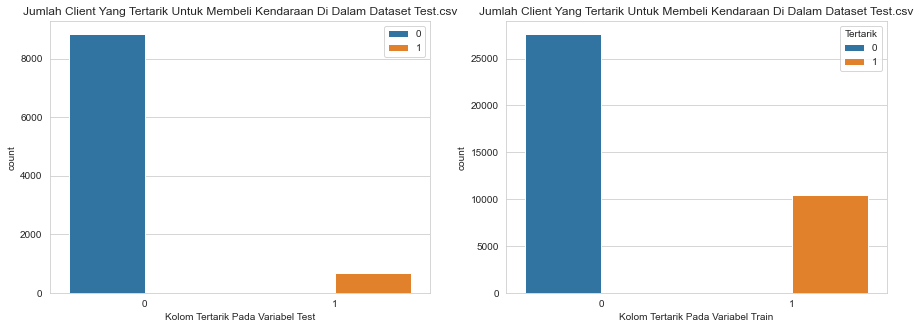

In [178]:
# Membuat visualisasi untuk memprediksi apakah client tertarik untuk membeli kendaraan/tidak di dalam data test.csv
plt.figure(figsize=(15, 5))

# Visualisasi kolom Target dari variable output_train
plt.subplot(1,2,1)
sns.countplot(x="Tertarik", hue="Tertarik", data=output_test)
plt.title("Jumlah Client Yang Tertarik Untuk Membeli Kendaraan Di Dalam Dataset Test.csv")
plt.xlabel("Kolom Tertarik Pada Variabel Test")
plt.legend()

# Visualisasi kolom Target dari variable output_train
plt.subplot(1,2,2)
sns.countplot(x="Tertarik", hue="Tertarik", data=output_train)
plt.title("Jumlah Client Yang Tertarik Untuk Membeli Kendaraan Di Dalam Dataset Test.csv")
plt.xlabel("Kolom Tertarik Pada Variabel Train")
plt.show()

# 0 = Pelanggan Tidak Tertarik & 1 = Pelanggan Tertarik